In [1]:
%matplotlib inline

In [2]:
from astropy.io import fits
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import os

In [3]:
cd/datag/blpd0/datax/apf

/datag/blpd0/datax/apf


In [4]:
apf_file = fits.open('ucb-aso211.fits')

In [5]:
header = apf_file[0].header
print(repr(header))

SIMPLE  =                    T / NORMAL FITS IMAGE                              
BITPIX  =                   16 / DATA PRECISION                                 
NAXIS   =                    2 / NUMBER OF IMAGE DIMENSIONS                     
NAXIS1  =                 2080 / NUMBER OF COLUMNS                              
NAXIS2  =                 4608 / NUMBER OF ROWS                                 
CRVAL1U =                    0 / COLUMN ORIGIN                                  
CRVAL2U =                    0 / ROW ORIGIN                                     
CDELT1U =                    1 / COLUMN CHANGE PER PIXEL                        
CDELT2U =                    1 / ROW CHANGE PER PIXEL                           
OBSNUM  =                  211 / OBSERVATION NUMBER                             
IDNUM   =                    2 / IMAGE ID                                       
UGEOM   =                    1 / UCAM READOUT GEOMETRY                          
DGEOM   =                   

In [6]:
print("Right Ascension: " + header['RA'])
print("Declination: " + header['DEC'])
print("Target Object: " + header['TOBJECT'])

Right Ascension:  0:39:19.8
Declination:  30:51:38.0
Target Object: HIP3092


In [7]:
image = apf_file[0].data

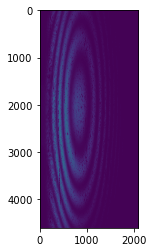

In [8]:
plt.imshow(image)

2080


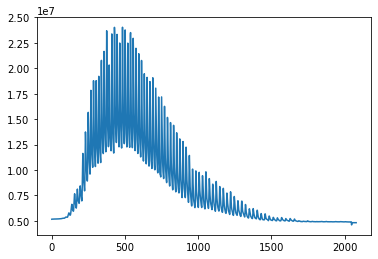

In [9]:
flux = np.sum(image, axis = 0)
plt.plot(flux)

print(len(flux))

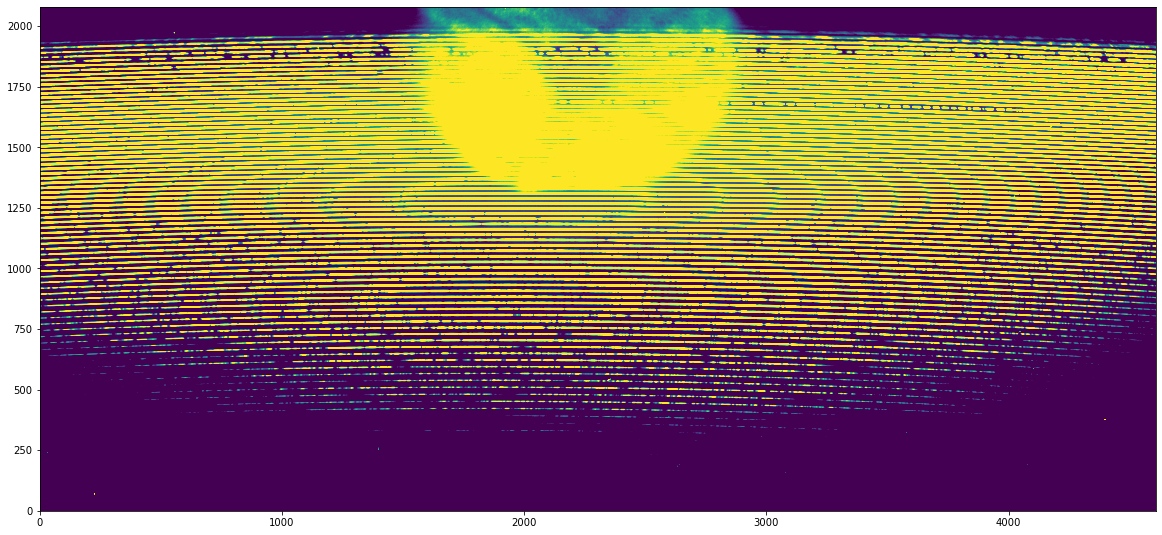

In [10]:
image_rot = np.rot90(image)
plt.figure(figsize=(20,20))
plt.imshow(image_rot, vmin = np.median(image_rot), vmax = np.median(image_rot) * 1.2, origin = 'lower')

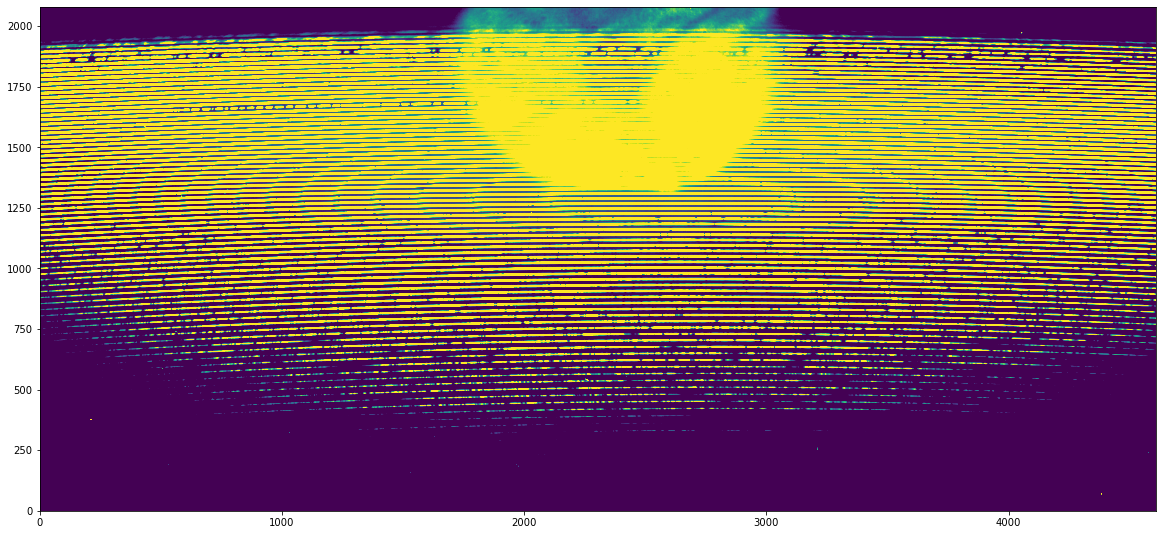

In [11]:
image_flip = np.fliplr(image_rot)
plt.figure(figsize=(20,20))
plt.imshow(image_flip, vmin = np.median(image_flip), vmax = np.median(image_flip) * 1.2, origin = 'lower')

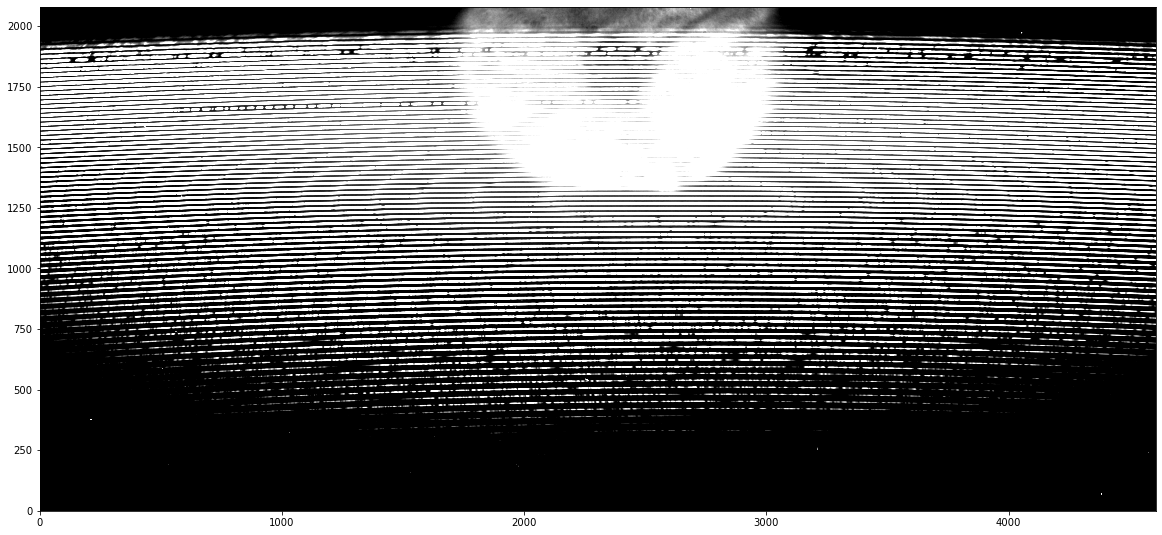

In [12]:
plt.figure(figsize=(20,20))
plt.imshow(image_flip, cmap = 'gray', 
           vmin = np.median(image_flip), vmax = np.median(image_flip) * 1.2, origin = 'lower')

Text(0.5, 1.0, 'small patch [1683:1688, 2200:2800] of telluric lines')

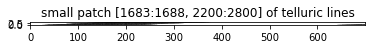

In [13]:
patch = image_flip[1683:1688, 500:1200]
# ^ Cutout of our 2D array, like a patch out of a quilt
plt.imshow(patch, cmap = 'gray', 
           vmin = np.median(image_flip), vmax = np.median(image_flip) *1.2, origin = 'lower')
plt.title('small patch [1683:1688, 2200:2800] of telluric lines')

Text(0.5, 1.0, 'small patch [1683:1688, 500:2000] of telluric lines')

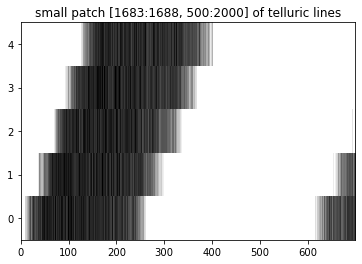

In [14]:
plt.imshow(image_flip[1683:1688, 500:1200], cmap = 'gray', aspect = 'auto', interpolation = 'nearest',
           vmin = np.median(image_flip), vmax = np.median(image_flip) *1.2, origin = 'lower')
plt.title('small patch [1683:1688, 500:2000] of telluric lines')

In [15]:
patch = image_flip[1690:1700, 500:1200]
patch.size

7000

In [16]:
telluric_1D = np.sum(patch, axis = 0)

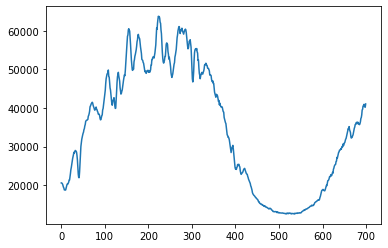

In [17]:
plt.plot(telluric_1D)

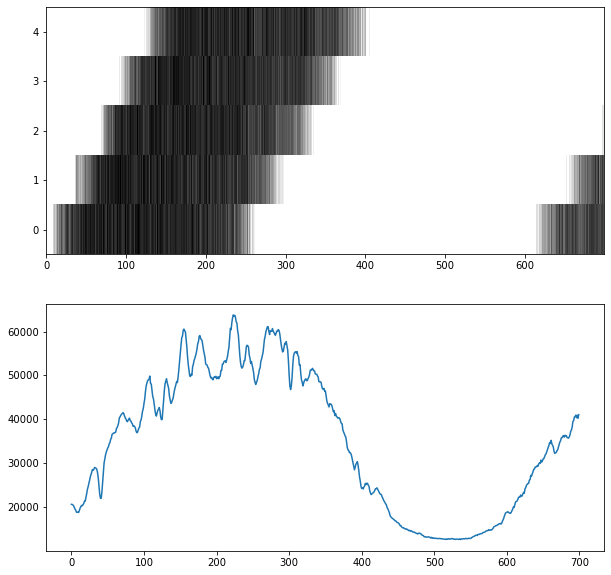

In [18]:
plt.figure(figsize =(10,10))
plt.subplot(2,1,1)
plt.imshow(image_flip[1683:1688,500:1200], cmap = 'gray', aspect = 'auto', 
           interpolation = 'nearest', origin = 'lower',
           vmin = np.median(image_flip), vmax = np.median(image_flip) *1.2)
plt.subplot(2,1,2)
plt.plot(telluric_1D)

In [19]:
bias = np.median(image_flip[-30:])
print (bias)

1085.0


Text(0.5, 1.0, 'Telluric Absorption (Adjusted) [1650:1660, 500:1000]')

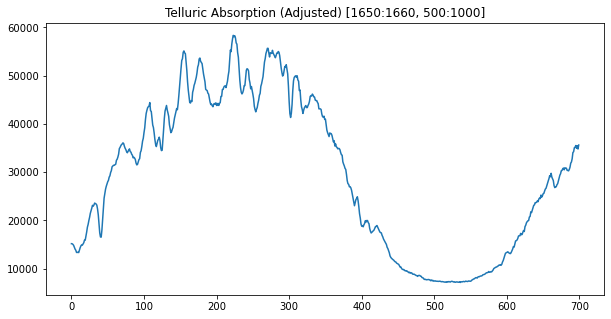

In [20]:
plt.figure(figsize=(10,5))
telluric_1D_adj = telluric_1D - (5*bias)
plt.plot(telluric_1D_adj)
plt.title('Telluric Absorption (Adjusted) [1650:1660, 500:1000]')

In [21]:
def cut_n_zoom(x1,x2,y1,y2):
    plt.figure(figsize=(10,10))
    plt.imshow(image_flip[x1:x2, y1:y2], cmap = 'gray', aspect = 'auto', 
               vmin = np.median(image), vmax = np.median(image) *1.2, origin = 'lower')
    plt.show()

In [22]:
#cutting out the patch with the absorption feature
h_alpha_patch = image_flip[1491:1506,1500:2500] 
#take the sum along the columns, and subtract 15 biases
h_alpha_patch_1D_without_bias = np.sum(h_alpha_patch, axis = 0) - bias*15

Text(0.5, 1.0, 'H-alpha')

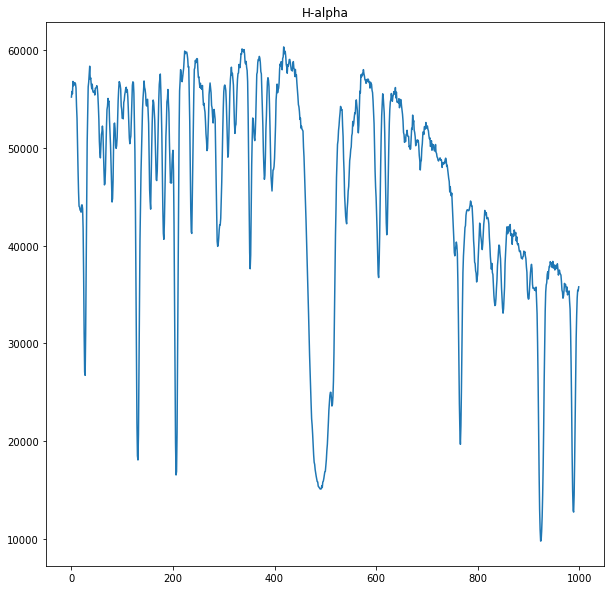

In [23]:
# Plotting H-alpha absorption line
plt.figure(figsize=(10,10))
plt.plot(np.sum(h_alpha_patch, axis = 0) - bias*15)
plt.title('H-alpha')

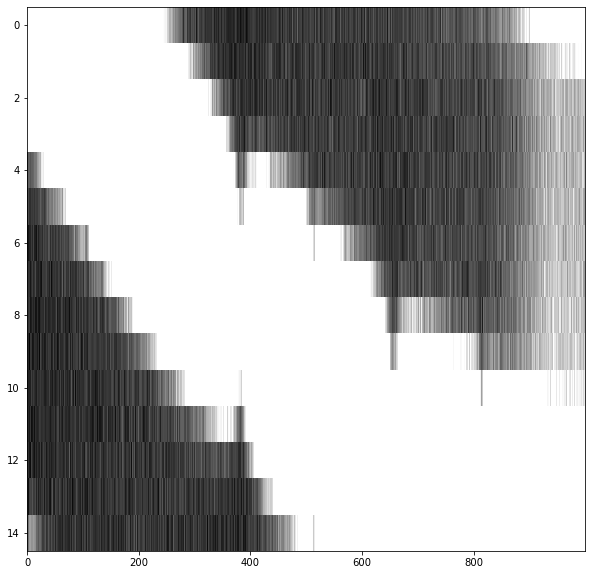

In [24]:
plt.figure(figsize=(10,10))
plt.imshow(image_flip[1333:1348,1200:2200], cmap = 'gray', aspect = 'auto', interpolation = 'nearest',
           vmin = np.median(image_flip), vmax = np.median(image_flip) *1.2)

Text(0.5, 1.0, 'Na-D lines')

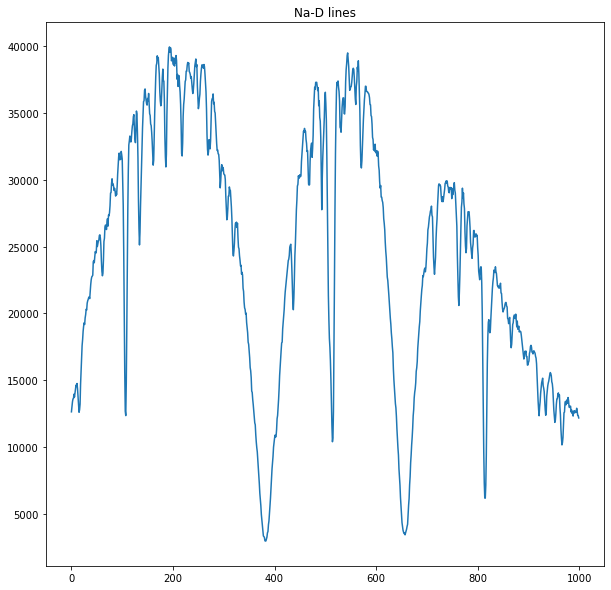

In [25]:
Na_D_patch = image_flip[1333:1348, 1200:2200]
Na_D_patch_1D = np.sum(Na_D_patch, axis = 0) - bias*15
plt.figure(figsize=(10,10))
plt.plot(Na_D_patch_1D)
plt.title('Na-D lines')

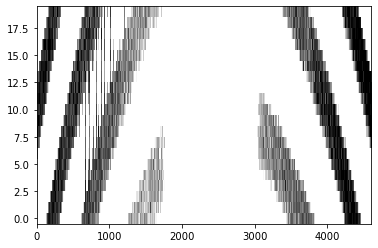

In [26]:
plt.imshow(image_flip[1650:1670], aspect = 'auto', origin = 'lower', cmap = "gray", 
           interpolation = 'nearest', vmin = np.median(image_flip), vmax = np.median(image_flip) *1.1)

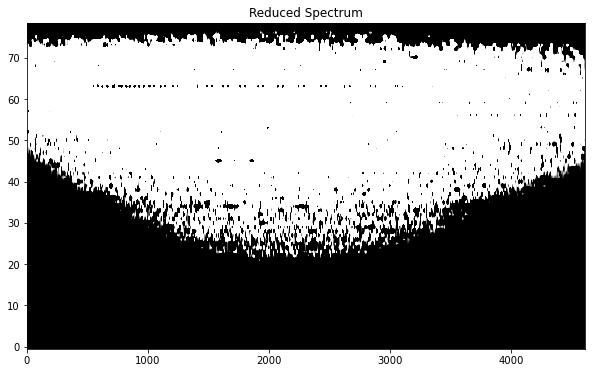

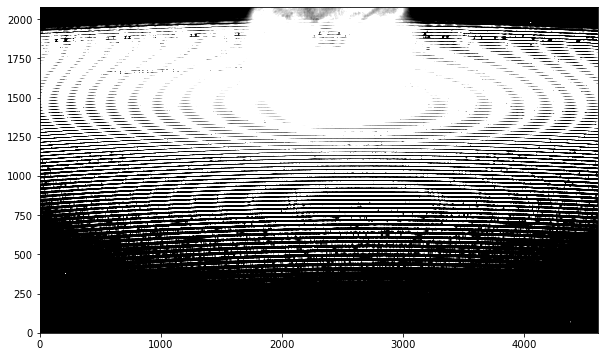

In [27]:
#Load the reduced .fits file and extracting the data
apf_reduced = fits.open('raso.211.fits')
reduced_image_fits = apf_reduced[0].data
#Plot an image of the reduced data
plt.figure(figsize=(10,6))
plt.imshow(reduced_image_fits, cmap = "gray", origin = "lower", aspect = "auto", 
           vmin = np.median(reduced_image_fits), vmax = np.median(reduced_image_fits) *1.1)
plt.title("Reduced Spectrum")
#Plot an image of the raw data
plt.figure(figsize=(10,6))
plt.imshow(image_flip, cmap = "gray", origin = "lower", aspect = "auto", 
           vmin = np.median(image_flip), vmax = np.median(image_flip) *1.1)

In [28]:
print("Right Ascension: " + header['RA'])
print("Declination: " + header['DEC'])
print("Target Object: " + header['TOBJECT'])
header_reduced = apf_reduced[0].header
print("Reduced - Right Ascension: " + header_reduced['RA'])
print("Reduced - Declination: " + header_reduced['DEC'])
print("Reduced - Target Object: " + header_reduced['TOBJECT'])

Right Ascension:  0:39:19.8
Declination:  30:51:38.0
Target Object: HIP3092
Reduced - Right Ascension:  0:39:19.8
Reduced - Declination:  30:51:38.0
Reduced - Target Object: HIP3092


In [33]:
os.chdir('/datag/blpd0/datax/apf')
apfdir = '/mnt_home/malikb'

In [37]:
f = os.path.join(apfdir, 'order_coefficients.txt')

In [38]:
text = open('order_coefficients.txt', "r")
lines = text.read().splitlines()
print (lines[0])

FileNotFoundError: [Errno 2] No such file or directory: 'order_coefficients.txt'

In [30]:
a0 = float(lines[0][6:13].strip())
a1 = float(lines[0][17:26].strip())
a2 = float(lines[0][27:39].strip())
a3 = float(lines[0][40:52].strip())
a4 = float(lines[0][54:].strip())
print(a0, a1, a2, a3, a4)

NameError: name 'lines' is not defined

In [ ]:
coeff_array = np.zeros((79,5))

In [ ]:
#Plots raw image
plt.figure(figsize=(12,8))
plt.imshow(image_flip, cmap = "gray", origin = "lower", 
        aspect = "auto", vmin = np.median(image_flip), 
        vmax = np.median(image_flip) *1.1)
#Sets array of x values, which the polynomials can then be plotted with
x = np.arange(0,4608)
#Plots each polynomial function over the raw image
for i in range(coeff_array[:,0].size):
    a0 = coeff_array[i,0]
    a1 = coeff_array[i,1]
    a2 = coeff_array[i,2]
    a3 = coeff_array[i,3]
    a4 = coeff_array[i,4]
    #Plots each order of coefficients to fit a fourth-degree polynomial
    plt.plot(x, a0 + a1*x + a2*x**2 + a3*x**3 + a4*x**4)
    #Sets the limit on the x-axis and the y-axis shown in the plots
    plt.xlim(0,4608)
    plt.ylim(0,2080)
plt.title("Raw image with polynomial functions overplotted")

In [ ]:
#Array of increasing x values
x = np.arange(0, 4608).astype(float)
#Empty array to fill in with y values from polynomials
y_values = np.zeros((79,4608))
#Empty array to fill in to create our reduced spectrum
poly_reduced_image = np.zeros((79,4608))
#Iteration loop that adds y values to the y_values array and 
#adds pixel values to the reduced_image array
for i in range(coeff_array[:,0].size):
    a0 = coeff_array[i,0]
    a1 = coeff_array[i,1]
    a2 = coeff_array[i,2]
    a3 = coeff_array[i,3]
    a4 = coeff_array[i,4]
    for j in range(x.size):
        y = a0 + a1*x[j] + a2*x[j]**2 + a3*x[j]**3 + a4*x[j]**4
        y_values[i,j] = y
        y = int(round(y))
        #We sum the pixel with three pixels above and three pixels below to ensure that 
        #we're including all of the important pixels in our reduced image
        poly_reduced_image[i,j] = int(np.sum(image_flip[y-3:y+4,j], 
            axis = 0)-7*bias)
plt.figure(figsize=(10,7))
plt.imshow(poly_reduced_image, cmap = "gray", origin = "lower", 
    aspect = "auto", vmin = np.median(poly_reduced_image), 
    vmax = np.median(poly_reduced_image))

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(2, 1, 1)
plt.imshow(poly_reduced_image, cmap = "gray", origin = "lower", 
    aspect = "auto", vmin = np.median(poly_reduced_image), 
    vmax = np.median(poly_reduced_image) *1.1)
plt.title("Reduced Image through Polyfit Technique")
plt.subplot(2, 1, 2)
plt.title("Reduced Image File")
plt.imshow(reduced_image_fits, cmap = "gray", origin = "lower", 
    aspect = "auto", vmin = np.median(reduced_image_fits), 
    vmax = np.median(reduced_image_fits))

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(2, 1, 1)
plt.plot(poly_reduced_image[53])
plt.ylim(0,60000)
plt.title("Reduced Image (Polyfit) H-alpha")

plt.subplot(2, 1, 2)
plt.plot(reduced_image_fits[53])
plt.ylim(0,60000)
plt.title("Reduced Image File H-alpha")

In [ ]:
from lmfit.models import GaussianModel

In [ ]:
os.chdir('/datag/blpd0/datax/apf')
apfdir = '/mnt_home/malikb'

In [ ]:
wave = fits.open(os.path.join(apfdir, 'apf_wav.fits'))
wave_values = wave[0].data

In [ ]:
x = wave_values[53,0:4000]
y = poly_reduced_image[53,0:4000]

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(x,y)

In [ ]:
wave_h_alpha = wave_values[53,1942-500:1942+500]

In [ ]:
reduced_h_alpha = poly_reduced_image[53,1942-500:1942+500]

In [ ]:
plt.plot(wave_h_alpha,reduced_h_alpha)

In [ ]:
left_median = np.median(reduced_h_alpha[0:50])
right_median = np.median(reduced_h_alpha[-50:])
median = (right_median + left_median)/2
print(median)